In [16]:
from scipy.optimize import fsolve
from scipy.special import comb
import matplotlib.pyplot as plt
import numpy as np
from math import isnan
from tqdm import tqdm

In [6]:
a = fsolve(f, 0.06, args=(1,11,0.15) )
print(a)
print(f(a,1,11,0.15))

[0.2752731]
[3.05311332e-16]


In [146]:
comb(2_000_000,60)

np.float64(1.3843328840311609e+296)

In [ ]:
pow(1-0.0001,2_000_000-60)

1.3701256127660493e-87

In [147]:
pow(0.0001,60)

1.0000000000000029e-240

In [2]:
from scipy.stats import binom
binom.cdf(2200, 2_000_000, 0.001)

np.float64(0.9999950032734763)

In [5]:
def f(epsilon,k,n,eta):
    return binom.cdf(k, n, epsilon)- eta
    sum_result = 0
    for i in range(0,k+1):
        #if isnan(comb(n,i)*pow(1-epsilon,n-i)):
         #   print(i,sum_result)
          #  input()
        sum_result += comb(n,i)*pow(epsilon,i)*pow(1-epsilon,n-i)
    return sum_result - eta

In [23]:
def solveEpsilon(k,n,eta,max_its=100, starting_point=None):
    starting_point = k/n if starting_point is None else _ #1# k/n #0.5
    epsilon = starting_point
    i = max_its
    while not (-1e-7<f(epsilon, k, n, eta) < 1e-7): #error bound 1e-7
        epsilon = fsolve(f, starting_point, args=(k,n,eta))
        starting_point /=1.05
        #print(starting_point)
        i-=1
        if i == 0:
            return -1
    #print(i)
    return epsilon



In [102]:
solveEpsilon(1,11,0.15)

0.09090909090909091
[1.66533454e-16]


array([0.2752731])

In [13]:
solveEpsilon(6_000_000_000,20_000_000_000,0.1)

0.2857142857142857
99


array([0.30000415])

  0%|          | 0/11000 [00:00<?, ?it/s]C:\Users\fabia\AppData\Local\Temp\ipykernel_2088\2755371456.py:4: RuntimeWarning: The iteration is not making good progress, as measured by the 
 improvement from the last ten iterations.
  a_overinputs.append(fsolve(f, starter, args=(1,11,0.15) ))
100%|██████████| 11000/11000 [00:12<00:00, 859.83it/s]


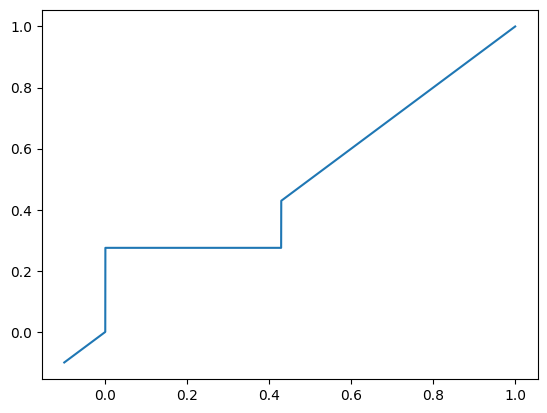

In [ ]:
#We see that doing a direct fsolve, our solution is very much dependant on our input. But for small enough inputs, it stabilises (and otherwise, it converges to the identity function and doesnt make any progress)
inputs = np.arange(-0.1,1,0.0001)
a_overinputs = []
for starter in tqdm(inputs):
    a_overinputs.append(fsolve(f, starter, args=(1,11,0.15) ))
plt.plot(inputs, a_overinputs)

100%|██████████| 11000/11000 [00:16<00:00, 670.30it/s]


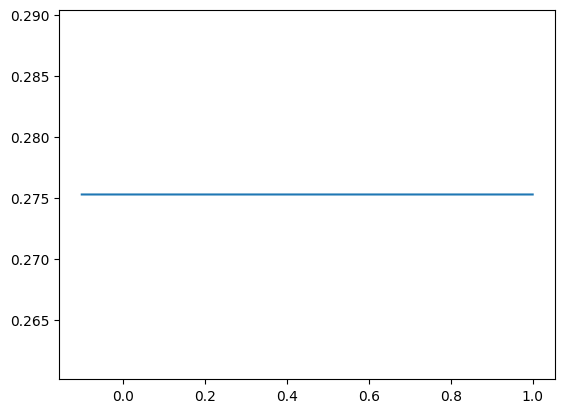

In [ ]:
#By changing the starting point until our solution epsiolon gets the LHS and RHS of our equation close enough, we get a stable answer!
inputs = np.arange(-0.1,1,0.0001)
a_overinputs = []
for starter in tqdm(inputs):
    a_overinputs.append(solveEpsilon(1,11,0.15))
plt.plot(inputs, a_overinputs)

Plotting how our bound epsilon changes as k and beta changes

100%|██████████| 980/980 [00:00<00:00, 1888.20it/s]


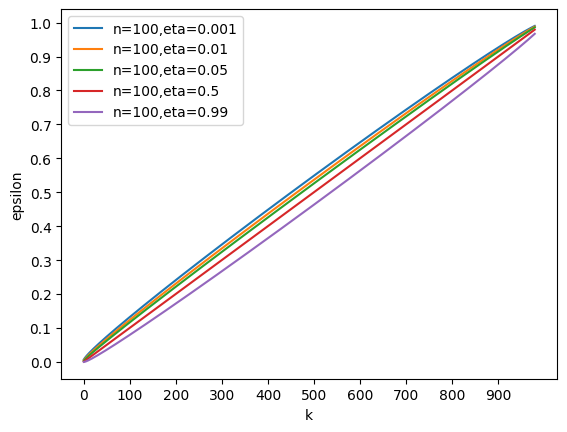

In [57]:
n=1000
ks = np.arange(0,980,1)

for beta in reversed([0.99,0.5,0.05,0.01,0.001]):
    epsilon_by_k = []
    for k in tqdm(ks):
        epsilon_by_k.append(solveEpsilon(k,n,beta))
    plt.plot(ks, epsilon_by_k, label=f"n=100,eta={beta}")

plt.xticks(ks[::100])
plt.yticks(np.arange(0,1.01,0.1))
plt.xlabel("k")
plt.ylabel("epsilon")

plt.legend()
plt.show()

100%|██████████| 41/41 [00:00<00:00, 1915.44it/s]


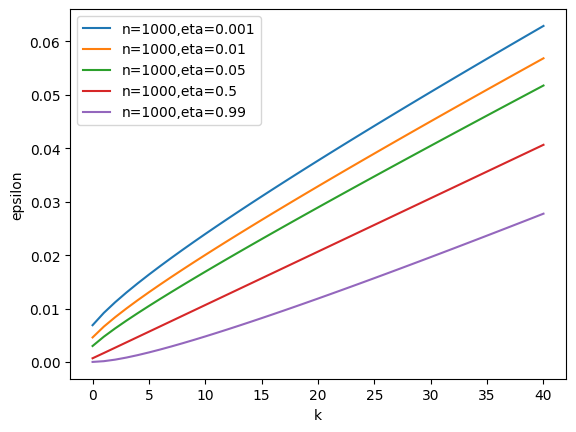

In [55]:
n=1000
ks = np.arange(0,40.6,1)

for beta in reversed([0.99,0.5,0.05,0.01,0.001]):
    epsilon_by_k = []
    for k in tqdm(ks):
        epsilon_by_k.append(solveEpsilon(k,n,beta))
    plt.plot(ks, epsilon_by_k, label=f"n=1000,eta={beta}")

plt.xticks(ks[::5])
#plt.yticks(np.arange(0,1.01,0.1))
plt.xlabel("k")
plt.ylabel("epsilon")

plt.legend()
plt.show()

100%|██████████| 100/100 [00:00<00:00, 2771.15it/s]


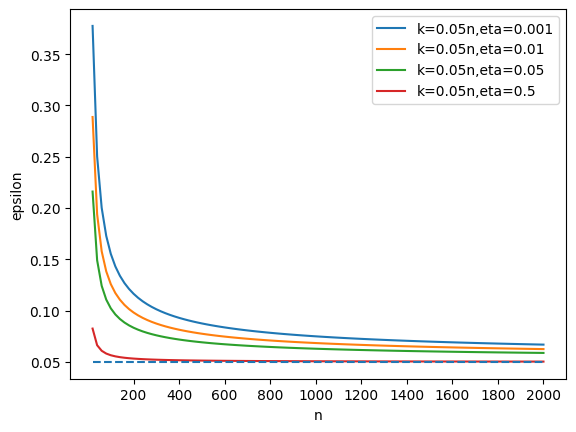

In [89]:
ns = np.arange(20,2001,20)
percent_to_discard = 0.05



for beta in reversed([0.5,0.05,0.01,0.001]):
    epsilon_by_n = []
    for n in tqdm(ns):
        k=np.round(n*percent_to_discard)
        epsilon_by_n.append(solveEpsilon(k,n,beta))
    plt.plot(ns, epsilon_by_n, label=f"k={percent_to_discard}n,eta={beta}")
    
plt.xticks(ns[9::10])
#plt.yticks(np.arange(0,1.01,0.1))
plt.xlabel("n")
plt.ylabel("epsilon")

plt.hlines(percent_to_discard,20,2000, linestyles="dashed")

plt.legend()
plt.show()

100%|██████████| 27/27 [00:00<00:00, 2785.47it/s]


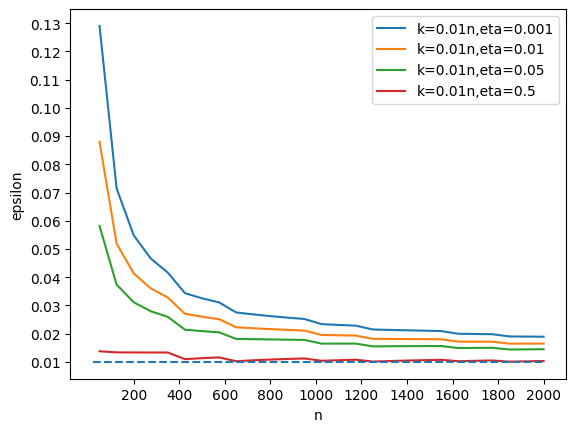

In [94]:
ns = np.arange(50,2001,75)
percent_to_discard = 0.01



for beta in reversed([0.5,0.05,0.01,0.001]):
    epsilon_by_n = []
    for n in tqdm(ns):
        k=np.round(n*percent_to_discard)
        epsilon_by_n.append(solveEpsilon(k,n,beta))
    plt.plot(ns, epsilon_by_n, label=f"k={percent_to_discard}n,eta={beta}")


plt.xticks(np.arange(200,2001,200))
plt.yticks(np.arange(0,1,0.01))
plt.xlabel("n")
plt.ylabel("epsilon")

plt.hlines(percent_to_discard,20,2000, linestyles="dashed")

plt.legend()
plt.show()